### Цели
1. Проанализировать текущий набор данных
2. Составить систему рекомендации для пользователей


Netflix — это стриминговый сервис, предоставляющий доступ к большому количеству фильмов, сериалов и других видеоматериалов. Пользователи могут смотреть контент на различных устройствах, таких как телевизоры, компьютеры, планшеты и смартфоны.

Проведем разведочный анализ данных (EDA) с полезной визуализацией и построим систему рекомендаций

### Предобработка данных

In [95]:
#загружаем необходимые библиотеки 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

Подключим данные  https://www.kaggle.com/datasets/shivamb/netflix-shows

и выведем первые 20 строчек датасета 

In [96]:
netflix_df=pd.read_csv('netflix_titles.csv')
netflix_df.head(20)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


Всего в этом датасете 12 признаков:
1. `show_id` - id-идентификатор фильма или сериала 
2. `type` - тип: фильм или сериал
3. `title` - название фильма или сериала
4. `director` -  режиссер произведения 
5. `cast` - актеры, участвующие в съемках
6. `country` - страна производства, может быть несколько
7. `date_added` - дата добавления на платформу 
8. `release_year` - год выхода 
9. `rating` -  возрастной рейтинг картины
10. `duration` - длительность картины
10. `listed_in` - категории произведения (жанры)
11. `description` - описание картины 

Также можно заметить, что в датасете есть пропуски

Для проверки количества пропусков и типов данных, выведем всю информацию о датафрейме с помощью метода `info`

In [97]:
netflix_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   show_id       8807 non-null   str  
 1   type          8807 non-null   str  
 2   title         8807 non-null   str  
 3   director      6173 non-null   str  
 4   cast          7982 non-null   str  
 5   country       7976 non-null   str  
 6   date_added    8797 non-null   str  
 7   release_year  8807 non-null   int64
 8   rating        8803 non-null   str  
 9   duration      8804 non-null   str  
 10  listed_in     8807 non-null   str  
 11  description   8807 non-null   str  
dtypes: int64(1), str(11)
memory usage: 825.8 KB


Как можно заметить, всего значений в датасете 8807, однако присутствуют пропуски, особенно это заметно в столбце с режиссером картины, где разница составляет почти 2000, также можно заметить, что дата сейчас является строкой, что необходимо поменять для корректной работы далее

Далее проверим датасет на явные и неявные дубликаты
Для начала используем метод `duplicated()`

In [98]:
netflix_df.duplicated().sum()

np.int64(0)

Как можно заметить, дубликатов нет. Теперь проверим неявные дубликаты (повторы, опечатки)


In [99]:
display(netflix_df['type'].unique())
display(netflix_df['country'].unique())

<StringArray>
['Movie', 'TV Show']
Length: 2, dtype: str

<StringArray>
[                                                        'United States',
                                                          'South Africa',
                                                                     nan,
                                                                 'India',
 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
                                                        'United Kingdom',
                                               'Germany, Czech Republic',
                                                                'Mexico',
                                                                'Turkey',
                                                             'Australia',
 ...
                        'Germany, United States, United Kingdom, Canada',
          'Canada, India, Thailand, United States, United Arab Emirates',
                             'United States, East Germany, West Germany',
                   

Как можно заметить, дубликатов нет
Теперь перейдем к типам данным, очевидно, что дату добавления лучше перевести в формат даты с помощью `pd.to_datetime`

In [100]:
netflix_df['date_added']=pd.to_datetime(netflix_df['date_added'].str.strip())


In [101]:
display(netflix_df.head(1))
netflix_df.info()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


<class 'pandas.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   str           
 1   type          8807 non-null   str           
 2   title         8807 non-null   str           
 3   director      6173 non-null   str           
 4   cast          7982 non-null   str           
 5   country       7976 non-null   str           
 6   date_added    8797 non-null   datetime64[us]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   str           
 9   duration      8804 non-null   str           
 10  listed_in     8807 non-null   str           
 11  description   8807 non-null   str           
dtypes: datetime64[us](1), int64(1), str(10)
memory usage: 825.8 KB


### Визуализация данных

Разобьем данные на фильмы и сериалы, чтобы вести аналитику отдельно по этим категориям

In [102]:
df_shows=netflix_df[netflix_df['type']=='TV Show'].copy()
df_movies=netflix_df[netflix_df['type']=='Movie'].copy()



/var/folders/49/mtwrx3c95k9833d2rmbhlm940000gn/T/ipykernel_35024/2699422810.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




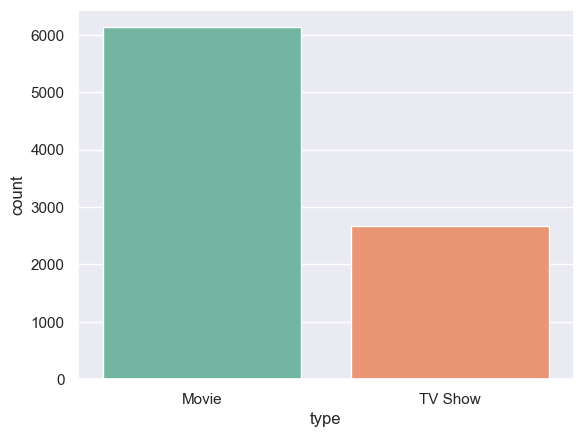

In [103]:
sns.set(style="darkgrid")
ax=sns.countplot(x='type',data=netflix_df, palette='Set2')

Как можно замтетить, большую часть датасета занимают фильмы, а не сериалы 

### Популярное время длительности

Посчитаем количество картин по разной длительности с помощью метода `value_counts`

In [104]:
topdur=netflix_df['duration'].value_counts()
topdur=topdur.sort_values(ascending=False)
topdur


duration
1 Season      1793
2 Seasons      425
3 Seasons      199
90 min         152
94 min         146
              ... 
273 min          1
17 Seasons       1
189 min          1
229 min          1
191 min          1
Name: count, Length: 220, dtype: int64

Отобразим эти значения на интерактивном графике с помощью библиотеки `plotly`

In [105]:
from plotly import graph_objects as go
fig=go.Figure([go.Bar(x=topdur.index,y=topdur.values,marker_color='indianred')])
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.show(renderer='vscode')

### Самый привлекательный для контента месяц

Проверяем пропуски у даты добавления с помощшью `isna` и `sum`

In [106]:
df_shows.isna().sum()

show_id            0
type               0
title              0
director        2446
cast             350
country          391
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

Как можно заметить, их 10 штук, избавимся от них c помощью метода  `dropna`

In [107]:
netflix_date=df_shows[['date_added']].dropna(inplace=False)
netflix_date.isna().sum()



date_added    0
dtype: int64

Создадим отдельные столбцы для года и месяца с помощью `dt` с указанием `year` или `month` 

In [108]:
netflix_date['year']=netflix_date['date_added'].dt.year
netflix_date['month']=netflix_date['date_added'].dt.month
netflix_date

,date_added,year,month
1,2021-09-24,2021,9
2,2021-09-24,2021,9
3,2021-09-24,2021,9
4,2021-09-24,2021,9
5,2021-09-24,2021,9
...,...,...,...
8795,2018-05-01,2018,5
8796,2017-01-17,2017,1
8797,2018-09-13,2018,9
8800,2016-12-15,2016,12


In [109]:
netflix_date.sort_values(by=['year','month'])

,date_added,year,month
6611,2008-02-04,2008,2
7112,2013-03-31,2013,3
5940,2013-08-02,2013,8
5939,2013-09-01,2013,9
6885,2013-10-08,2013,10
...,...,...,...
153,2021-09-01,2021,9
154,2021-09-01,2021,9
160,2021-09-01,2021,9
165,2021-09-01,2021,9


Для удобства преобразуем название месяца в текст

In [110]:
netflix_date['month'] = pd.to_datetime(
    netflix_date['month'],
    format='%m'
).dt.month_name()
netflix_date

,date_added,year,month
1,2021-09-24,2021,September
2,2021-09-24,2021,September
3,2021-09-24,2021,September
4,2021-09-24,2021,September
5,2021-09-24,2021,September
...,...,...,...
8795,2018-05-01,2018,May
8796,2017-01-17,2017,January
8797,2018-09-13,2018,September
8800,2016-12-15,2016,December


Выведем количество фильмов по месяцам и годам

In [115]:
month_order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df=netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
df

year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,
January,0.0,0.0,0.0,0.0,28.0,14.0,24.0,37.0,53.0,36.0
February,1.0,0.0,1.0,1.0,6.0,17.0,24.0,45.0,42.0,44.0
March,0.0,1.0,0.0,2.0,3.0,38.0,35.0,53.0,44.0,37.0
April,0.0,0.0,1.0,4.0,8.0,27.0,28.0,43.0,50.0,53.0
May,0.0,0.0,0.0,1.0,4.0,23.0,27.0,48.0,52.0,38.0
June,0.0,0.0,0.0,2.0,7.0,29.0,28.0,46.0,41.0,83.0
July,0.0,0.0,0.0,2.0,9.0,34.0,27.0,59.0,43.0,88.0
August,0.0,1.0,0.0,0.0,11.0,38.0,34.0,44.0,47.0,61.0
September,0.0,1.0,0.0,1.0,19.0,32.0,43.0,37.0,53.0,65.0


Построим тепловую карту количества выпуска картин по годам и месяцам

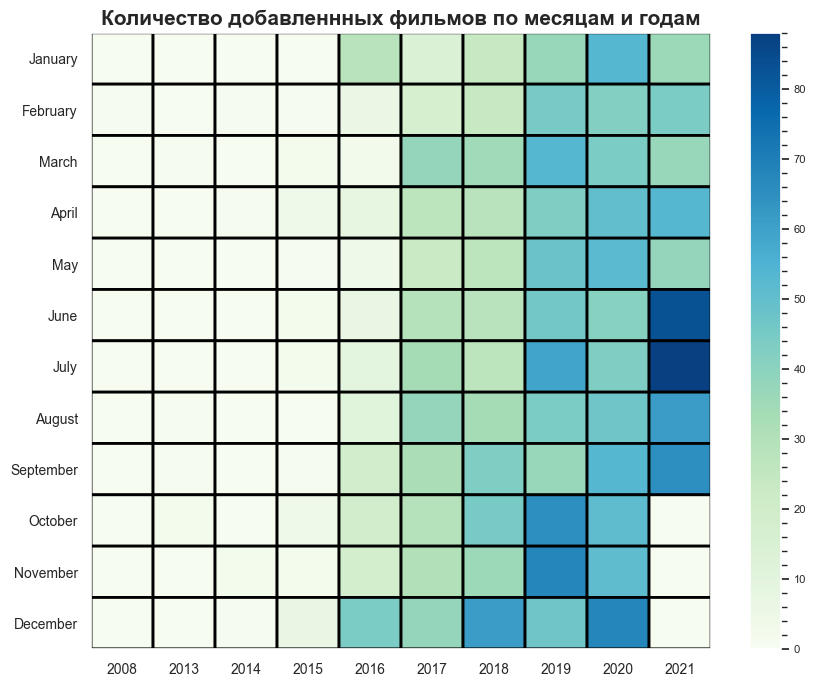

In [132]:

plt.figure(figsize=(10,8),dpi=100)
plt.xticks(np.arange(0.5,len(df.columns),1),df.columns,fontsize=10)
plt.yticks(np.arange(0.5,len(df.index),1),df.index,fontsize=10)
plt.pcolor(df,cmap='GnBu',edgecolor='black',linewidth=2)
cbar=plt.colorbar()
cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.title('Количество добавленнных фильмов по месяцам и годам',fontsize=15,fontweight='bold')
plt.gca().invert_yaxis()



Как можно заметить, большая часть фильмов выходит в июне и июле, что логично, ведь чашще всего люди летом отдыхают и  могут больше уделять время просмотру картин, однако достататочно маленькое количество выходит в декабре и январе, а ведь в это время тоже каникулы и большой спрос на просмотр фильмов, особенно новогодней тематики 